# Load data

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data \
    -O sonar.csv &> /dev/null

In [0]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt


In [0]:
dataframe = pd.read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [0]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y.shape

(208,)

In [0]:
le=LabelEncoder()
Y1=le.fit_transform(Y)
print( Y1.shape)

(208,)


In [0]:
from sklearn.model_selection import train_test_split


In [0]:
seed = 7
np.random.seed(seed)

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,encoded_Y,test_size=0.25,random_state=42)


In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(156, 60)
(156,)
(52, 60)
(52,)


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

# Train model with single layer logistic regression

In [0]:
model = Sequential({
Dense(1, input_shape=(60,), activation='sigmoid')
})

In [0]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])



In [0]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Train on 156 samples, validate on 52 samples
Epoch 1/20
156/156 [==============================] - 0s 454us/step - loss: 4.4882 - binary_accuracy: 0.5064 - val_loss: 0.7045 - val_binary_accuracy: 0.5000
Epoch 2/20
156/156 [==============================] - 0s 83us/step - loss: 0.7253 - binary_accuracy: 0.5128 - val_loss: 0.6974 - val_binary_accuracy: 0.5385
Epoch 3/20
156/156 [==============================] - 0s 71us/step - loss: 0.7221 - binary_accuracy: 0.5192 - val_loss: 0.6893 - val_binary_accuracy: 0.5962
Epoch 4/20
156/156 [==============================] - 0s 65us/step - loss: 0.7206 - binary_accuracy: 0.5192 - val_loss: 0.6881 - val_binary_accuracy: 0.5577
Epoch 5/20
156/156 [==============================] - 0s 81us/step - loss: 0.7157 - binary_accuracy: 0.5449 - val_loss: 0.6824 - val_binary_accuracy: 0.5577
Epoch 6/20
156/156 [==============================] - 0s 74us/step - loss: 0.7077 - binary_accuracy: 0.5321 - val_loss: 0.6752 - val_binary_accuracy: 0.5962
Epoch 7/20
1

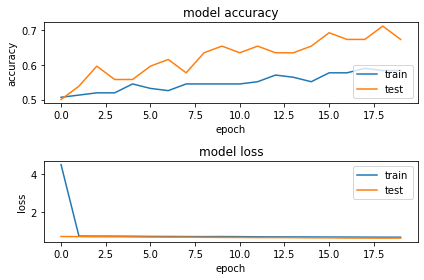

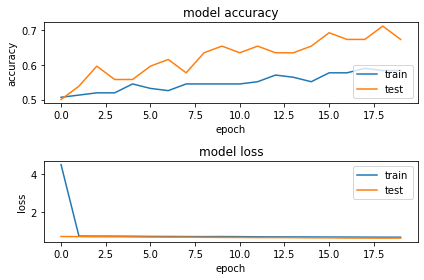

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [0]:
# 1-dimensional MSE linear regression in Keras
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1]))
model.compile(optimizer='rmsprop', loss='mse')
history1 = model.fit(X_train, Y_train, nb_epoch=10, validation_data=(X_test, Y_test))





Train on 156 samples, validate on 52 samples
Epoch 1/10
 32/156 [=====>........................] - ETA: 0s - loss: 0.2547

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


156/156 [==============================] - 0s 299us/step - loss: 0.2801 - val_loss: 0.2581
Epoch 2/10
156/156 [==============================] - 0s 53us/step - loss: 0.2734 - val_loss: 0.2523
Epoch 3/10
156/156 [==============================] - 0s 56us/step - loss: 0.2711 - val_loss: 0.2484
Epoch 4/10
156/156 [==============================] - 0s 53us/step - loss: 0.2694 - val_loss: 0.2449
Epoch 5/10
156/156 [==============================] - 0s 63us/step - loss: 0.2650 - val_loss: 0.2422
Epoch 6/10
156/156 [==============================] - 0s 63us/step - loss: 0.2638 - val_loss: 0.2394
Epoch 7/10
156/156 [==============================] - 0s 63us/step - loss: 0.2620 - val_loss: 0.2366
Epoch 8/10
156/156 [==============================] - 0s 84us/step - loss: 0.2614 - val_loss: 0.2343
Epoch 9/10
156/156 [==============================] - 0s 74us/step - loss: 0.2583 - val_loss: 0.2322
Epoch 10/10
156/156 [==============================] - 0s 66us/step - loss: 0.2564 - val_loss: 0.2305

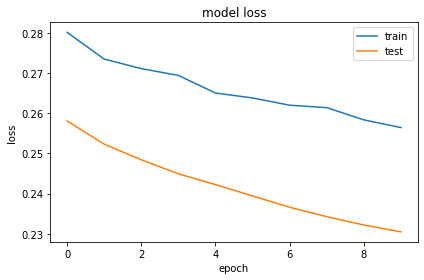

In [0]:
# plotting the metrics
fig = plt.figure()
# plt.subplot(2,1,1)
# plt.plot(history1.history['binary_accuracy'])
# plt.plot(history1.history['val_binary_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='lower right')

#plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

#fig

In [0]:
# 2-class logistic regression in Keras
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
history2 = model.fit(X_train, Y_train, nb_epoch=10, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 156 samples, validate on 52 samples
Epoch 1/10
156/156 [==============================] - 0s 390us/step - loss: 0.6637 - val_loss: 0.6722
Epoch 2/10
156/156 [==============================] - 0s 62us/step - loss: 0.6615 - val_loss: 0.6693
Epoch 3/10
156/156 [==============================] - 0s 63us/step - loss: 0.6597 - val_loss: 0.6670
Epoch 4/10
156/156 [==============================] - 0s 65us/step - loss: 0.6585 - val_loss: 0.6644
Epoch 5/10
156/156 [==============================] - 0s 77us/step - loss: 0.6567 - val_loss: 0.6622
Epoch 6/10
156/156 [==============================] - 0s 67us/step - loss: 0.6563 - val_loss: 0.6606
Epoch 7/10
156/156 [==============================] - 0s 67us/step - loss: 0.6549 - val_loss: 0.6584
Epoch 8/10
156/156 [==============================] - 0s 67us/step - loss: 0.6538 - val_loss: 0.6561
Epoch 9/10
156/156 [==============================] - 0s 70us/step - loss: 0.6526 - val_loss: 0.6542
Epoch 10/10
156/156 [========================

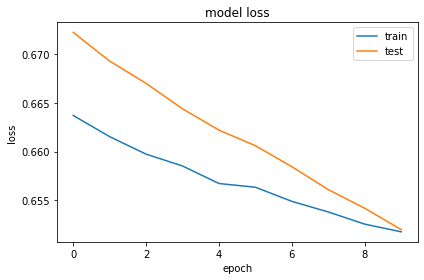

In [0]:
# plotting the metrics
# fig = plt.figure()
# plt.subplot(2,1,1)
# plt.plot(history2.history['binary_accuracy'])
# plt.plot(history2.history['val_binary_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='lower right')

#plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

#fig

In [0]:
# logistic regression with L1 and L2 regularization
from keras.regularizers import L1L2

reg = L1L2(l1=0.01, l2=0.01)

model = Sequential()
model.add(Dense(1, activation='sigmoid', W_regularizer=reg, input_dim=X_train.shape[1]))
model.compile(optimizer='rmsprop', loss='binary_crossentropy')
history3 = model.fit(X_train, Y_train, nb_epoch=10, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=60, kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 156 samples, validate on 52 samples
Epoch 1/10
156/156 [==============================] - 0s 392us/step - loss: 0.8496 - val_loss: 0.8995
Epoch 2/10
156/156 [==============================] - 0s 73us/step - loss: 0.8378 - val_loss: 0.8869
Epoch 3/10
156/156 [==============================] - 0s 75us/step - loss: 0.8302 - val_loss: 0.8769
Epoch 4/10
156/156 [==============================] - 0s 62us/step - loss: 0.8239 - val_loss: 0.8683
Epoch 5/10
156/156 [==============================] - 0s 61us/step - loss: 0.8186 - val_loss: 0.8601
Epoch 6/10
156/156 [==============================] - 0s 77us/step - loss: 0.8142 - val_loss: 0.8537
Epoch 7/10
156/156 [==============================] - 0s 62us/step - loss: 0.8097 - val_loss: 0.8476
Epoch 8/10
156/156 [==============================] - 0s 75us/step - loss: 0.8064 - val_loss: 0.8414
Epoch 9/10
156/156 [==============================] - 0s 90us/step - loss: 0.8020 - val_loss: 0.8358
Epoch 10/10
156/156 [========================

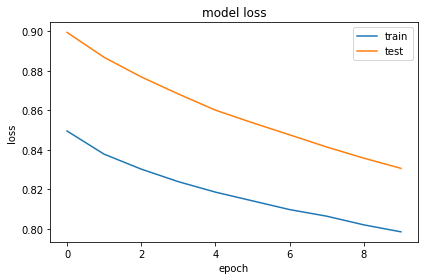

In [0]:
# plotting the metrics
fig = plt.figure()
# plt.subplot(2,1,1)
# plt.plot(history3.history['binary_accuracy'])
# plt.plot(history3.history['val_binary_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='lower right')

# plt.subplot(2,1,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

#fig

In [0]:


"""
Set up the logistic regression model
"""
model = Sequential()
model.add(Dense(1,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=60)) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])